In [4]:
import numpy as np
import array
import sys
from uproot_tree import UprootTree

t = UprootTree()

t.add("inclusive_10_15_jfch.root", "tn_events_jfch", 'ev')

t.add('inclusive_10_15_jfch_jet_full.root', 'tn_jet_jet_full', 'jet')
t.add('inclusive_10_15_jfch_jet_full.root', 'tn_parts_jet_full', 'part')

# t.add("inclusive_10_15_jfch.root", "tn_correl_jfch", 'corr')
# t.add_cut("corr_pt", 0, 1000)

# t.add_query('*', 'nev < 50000')


In [5]:
t.reset()
t.add_group_by('nev', 'xsec', 'ev_weight')
t.add_cut("ev", "njets", 1, 1000)
t.add_cut("jet", "pt", 10, 15)

# how to fill a histogram:
data_jet = t.get_unique(['jet*'])
data1 = data_jet['jet_pt']

t.reset()
t.add_cut("ev", "njets", 1, 1000)
t.add_query('*', 'nev > 10000')
t.add_group_by('nev', 'xsec', 'ev_weight')

# how to fill a histogram:
data_jet = t.get_unique(['jet*'])
data2 = data_jet['jet_pt']


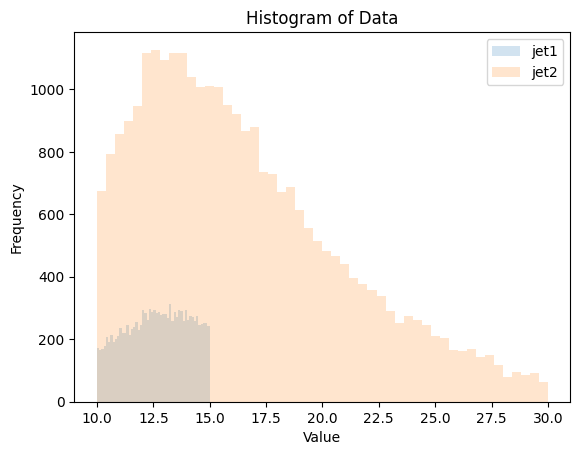

In [6]:
import matplotlib.pyplot as plt

num_bins = 50
# Define the bin edges
bin_edges = np.linspace(start=min(data1.min(), data2.min()), 
                        stop=max(data1.max(), data2.max()), 
                        num=num_bins + 1)  # num is number of bins + 1

plt.hist(data1, bins=bin_edges, alpha=0.2, label='jet1')
plt.hist(data2, bins=bin_edges, alpha=0.2, label='jet2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.legend(loc='upper right')
plt.show()